## Dependências

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", 500)

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

In D:\Anaconda\envs\tf\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In D:\Anaconda\envs\tf\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In D:\Anaconda\envs\tf\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In D:\Anaconda\envs\tf\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In D:\Anaconda\envs\tf\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.jpeg_

## Exploração e visualização dos dados

In [2]:
employee_df = pd.read_csv("Human_Resources.csv")
employee_df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2  Female          94               3         2   
1                        3    Male          61               2         2   
2                        4    Male          92               2         1   
3                        4  Female          56               3         1   
4                        1    Male          40               3         1   

                 JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0        Sales Executive                4        Single           5993   
1     Research Scientist                2       Married           5130   
2  Laboratory Technician                3        Single           2090   
3     Research Scientist                3       Married           2909   
4  Laboratory Technician                2       Married           3468   

   MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
0        19479                   8      Y      Yes                 11   
1        24907                   1      Y       No                 23   
2         2396                   6      Y      Yes                 15   
3        23159                   1      Y      Yes                 11   
4        16632                   9      Y       No                 12   

   PerformanceRating  RelationshipSatisfaction  StandardHours  \
0                  3                         1             80   
1                  4                         4             80   
2                  3                         2             80   
3                  3                         3             80   
4                  3                         4             80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

In [3]:
employee_df.shape

(1470, 35)

In [4]:
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
employee_df.describe().T

count          mean          std     min      25%  \
Age                       1470.0     36.923810     9.135373    18.0    30.00   
DailyRate                 1470.0    802.485714   403.509100   102.0   465.00   
DistanceFromHome          1470.0      9.192517     8.106864     1.0     2.00   
Education                 1470.0      2.912925     1.024165     1.0     2.00   
EmployeeCount             1470.0      1.000000     0.000000     1.0     1.00   
EmployeeNumber            1470.0   1024.865306   602.024335     1.0   491.25   
EnvironmentSatisfaction   1470.0      2.721769     1.093082     1.0     2.00   
HourlyRate                1470.0     65.891156    20.329428    30.0    48.00   
JobInvolvement            1470.0      2.729932     0.711561     1.0     2.00   
JobLevel                  1470.0      2.063946     1.106940     1.0     1.00   
JobSatisfaction           1470.0      2.728571     1.102846     1.0     2.00   
MonthlyIncome             1470.0   6502.931293  4707.956783  1009.0  2911.00   
MonthlyRate               1470.0  14313.103401  7117.786044  2094.0  8047.00   
NumCompaniesWorked        1470.0      2.693197     2.498009     0.0     1.00   
PercentSalaryHike         1470.0     15.209524     3.659938    11.0    12.00   
PerformanceRating         1470.0      3.153741     0.360824     3.0     3.00   
RelationshipSatisfaction  1470.0      2.712245     1.081209     1.0     2.00   
StandardHours             1470.0     80.000000     0.000000    80.0    80.00   
StockOptionLevel          1470.0      0.793878     0.852077     0.0     0.00   
TotalWorkingYears         1470.0     11.279592     7.780782     0.0     6.00   
TrainingTimesLastYear     1470.0      2.799320     1.289271     0.0     2.00   
WorkLifeBalance           1470.0      2.761224     0.706476     1.0     2.00   
YearsAtCompany            1470.0      7.008163     6.126525     0.0     3.00   
YearsInCurrentRole        1470.0      4.229252     3.623137     0.0     2.00   
YearsSinceLastPromotion   1470.0      2.187755     3.222430     0.0     0.00   
YearsWithCurrManager      1470.0      4.123129     3.568136     0.0     2.00   

                              50%       75%      max  
Age                          36.0     43.00     60.0  
DailyRate                   802.0   1157.00   1499.0  
DistanceFromHome              7.0     14.00     29.0  
Education                     3.0      4.00      5.0  
EmployeeCount                 1.0      1.00      1.0  
EmployeeNumber             1020.5   1555.75   2068.0  
EnvironmentSatisfaction       3.0      4.00      4.0  
HourlyRate                   66.0     83.75    100.0  
JobInvolvement                3.0      3.00      4.0  
JobLevel                      2.0      3.00      5.0  
JobSatisfaction               3.0      4.00      4.0  
MonthlyIncome              4919.0   8379.00  19999.0  
MonthlyRate               14235.5  20461.50  26999.0  
NumCompaniesWorked            2.0      4.00      9.0  
PercentSalaryHike            14.0     18.00     25.0  
PerformanceRating             3.0      3.00      4.0  
RelationshipSatisfaction      3.0      4.00      4.0  
StandardHours                80.0     80.00     80.0  
StockOptionLevel              1.0      1.00      3.0  
TotalWorkingYears            10.0     15.00     40.0  
TrainingTimesLastYear         3.0      3.00      6.0  
WorkLifeBalance               3.0      3.00      4.0  
YearsAtCompany                5.0      9.00     40.0  
YearsInCurrentRole            3.0      7.00     18.0  
YearsSinceLastPromotion       1.0      3.00     15.0  
YearsWithCurrManager          3.0      7.00     17.0

In [6]:
employee_df['Attrition'] = employee_df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)
employee_df.head()

Age  Attrition     BusinessTravel  DailyRate              Department  \
0   41          1      Travel_Rarely       1102                   Sales   
1   49          0  Travel_Frequently        279  Research & Development   
2   37          1      Travel_Rarely       1373  Research & Development   
3   33          0  Travel_Frequently       1392  Research & Development   
4   27          0      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2  Female          94               3         2   
1                        3    Male          61               2         2   
2                        4    Male          92               2         1   
3                        4  Female          56               3         1   
4                        1    Male          40               3         1   

                 JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0        Sales Executive                4        Single           5993   
1     Research Scientist                2       Married           5130   
2  Laboratory Technician                3        Single           2090   
3     Research Scientist                3       Married           2909   
4  Laboratory Technician                2       Married           3468   

   MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
0        19479                   8      Y      Yes                 11   
1        24907                   1      Y       No                 23   
2         2396                   6      Y      Yes                 15   
3        23159                   1      Y      Yes                 11   
4        16632                   9      Y       No                 12   

   PerformanceRating  RelationshipSatisfaction  StandardHours  \
0                  3                         1             80   
1                  4                         4             80   
2                  3                         2             80   
3                  3                         3             80   
4                  3                         4             80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

In [7]:
employee_df['OverTime'] = employee_df['OverTime'].apply(lambda x: 1 if x == 'Yes' else 0)
employee_df['Over18'] = employee_df['Over18'].apply(lambda x: 1 if x == 'Yes' else 0)
employee_df.head()

Age  Attrition     BusinessTravel  DailyRate              Department  \
0   41          1      Travel_Rarely       1102                   Sales   
1   49          0  Travel_Frequently        279  Research & Development   
2   37          1      Travel_Rarely       1373  Research & Development   
3   33          0  Travel_Frequently       1392  Research & Development   
4   27          0      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2  Female          94               3         2   
1                        3    Male          61               2         2   
2                        4    Male          92               2         1   
3                        4  Female          56               3         1   
4                        1    Male          40               3         1   

                 JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0        Sales Executive                4        Single           5993   
1     Research Scientist                2       Married           5130   
2  Laboratory Technician                3        Single           2090   
3     Research Scientist                3       Married           2909   
4  Laboratory Technician                2       Married           3468   

   MonthlyRate  NumCompaniesWorked  Over18  OverTime  PercentSalaryHike  \
0        19479                   8       0         1                 11   
1        24907                   1       0         0                 23   
2         2396                   6       0         1                 15   
3        23159                   1       0         1                 11   
4        16632                   9       0         0                 12   

   PerformanceRating  RelationshipSatisfaction  StandardHours  \
0                  3                         1             80   
1                  4                         4             80   
2                  3                         2             80   
3                  3                         3             80   
4                  3                         4             80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

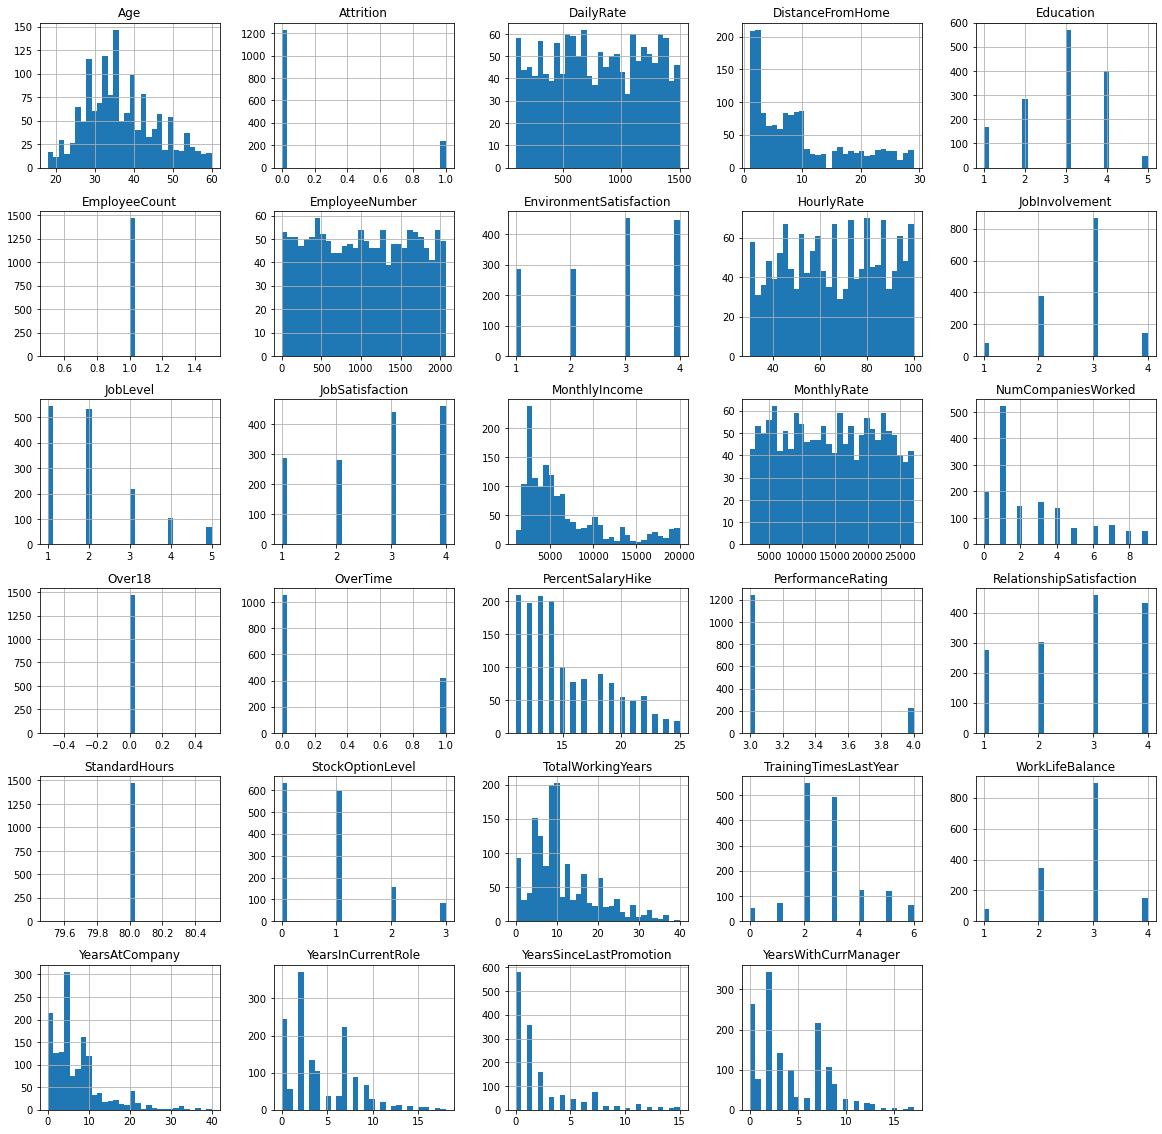

In [8]:
employee_df.hist(bins=30, figsize=(20, 20));

In [9]:
employee_df.drop(['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber'], axis=1, inplace=True)

In [10]:
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [11]:
# Sub dataframes
left_df = employee_df[employee_df['Attrition'] == 1]
stayed_df = employee_df[employee_df['Attrition'] == 0]

In [12]:
print('Total: ', len(employee_df))
print('Funcionários que sairam: ', len(left_df))
print('Porcentagem de saída: {:.2f} %'  .format((len(left_df) / len(employee_df)) * 100))

Total:  1470
Funcionários que sairam:  237
Porcentagem de saída: 16.12 %


In [13]:
# Estatísticas
left_df.describe().T

count          mean          std     min     25%  \
Age                       237.0     33.607595     9.689350    18.0    28.0   
Attrition                 237.0      1.000000     0.000000     1.0     1.0   
DailyRate                 237.0    750.362869   401.899519   103.0   408.0   
DistanceFromHome          237.0     10.632911     8.452525     1.0     3.0   
Education                 237.0      2.839662     1.008244     1.0     2.0   
EnvironmentSatisfaction   237.0      2.464135     1.169791     1.0     1.0   
HourlyRate                237.0     65.573840    20.099958    31.0    50.0   
JobInvolvement            237.0      2.518987     0.773405     1.0     2.0   
JobLevel                  237.0      1.637131     0.940594     1.0     1.0   
JobSatisfaction           237.0      2.468354     1.118058     1.0     1.0   
MonthlyIncome             237.0   4787.092827  3640.210367  1009.0  2373.0   
MonthlyRate               237.0  14559.308017  7208.153264  2326.0  8870.0   
NumCompaniesWorked        237.0      2.940928     2.678519     0.0     1.0   
OverTime                  237.0      0.535865     0.499768     0.0     0.0   
PercentSalaryHike         237.0     15.097046     3.770294    11.0    12.0   
PerformanceRating         237.0      3.156118     0.363735     3.0     3.0   
RelationshipSatisfaction  237.0      2.599156     1.125437     1.0     2.0   
StockOptionLevel          237.0      0.527426     0.856361     0.0     0.0   
TotalWorkingYears         237.0      8.244726     7.169204     0.0     3.0   
TrainingTimesLastYear     237.0      2.624473     1.254784     0.0     2.0   
WorkLifeBalance           237.0      2.658228     0.816453     1.0     2.0   
YearsAtCompany            237.0      5.130802     5.949984     0.0     1.0   
YearsInCurrentRole        237.0      2.902954     3.174827     0.0     0.0   
YearsSinceLastPromotion   237.0      1.945148     3.153077     0.0     0.0   
YearsWithCurrManager      237.0      2.852321     3.143349     0.0     0.0   

                              50%      75%      max  
Age                          32.0     39.0     58.0  
Attrition                     1.0      1.0      1.0  
DailyRate                   699.0   1092.0   1496.0  
DistanceFromHome              9.0     17.0     29.0  
Education                     3.0      4.0      5.0  
EnvironmentSatisfaction       3.0      4.0      4.0  
HourlyRate                   66.0     84.0    100.0  
JobInvolvement                3.0      3.0      4.0  
JobLevel                      1.0      2.0      5.0  
JobSatisfaction               3.0      3.0      4.0  
MonthlyIncome              3202.0   5916.0  19859.0  
MonthlyRate               14618.0  21081.0  26999.0  
NumCompaniesWorked            1.0      5.0      9.0  
OverTime                      1.0      1.0      1.0  
PercentSalaryHike            14.0     17.0     25.0  
PerformanceRating             3.0      3.0      4.0  
RelationshipSatisfaction      3.0      4.0      4.0  
StockOptionLevel              0.0      1.0      3.0  
TotalWorkingYears             7.0     10.0     40.0  
TrainingTimesLastYear         2.0      3.0      6.0  
WorkLifeBalance               3.0      3.0      4.0  
YearsAtCompany                3.0      7.0     40.0  
YearsInCurrentRole            2.0      4.0     15.0  
YearsSinceLastPromotion       1.0      2.0     15.0  
YearsWithCurrManager          2.0      5.0     14.0

In [14]:
stayed_df.describe().T

count          mean          std     min     25%  \
Age                       1233.0     37.561233     8.888360    18.0    31.0   
Attrition                 1233.0      0.000000     0.000000     0.0     0.0   
DailyRate                 1233.0    812.504461   403.208379   102.0   477.0   
DistanceFromHome          1233.0      8.915653     8.012633     1.0     2.0   
Education                 1233.0      2.927007     1.027002     1.0     2.0   
EnvironmentSatisfaction   1233.0      2.771290     1.071132     1.0     2.0   
HourlyRate                1233.0     65.952149    20.380754    30.0    48.0   
JobInvolvement            1233.0      2.770479     0.692050     1.0     2.0   
JobLevel                  1233.0      2.145985     1.117933     1.0     1.0   
JobSatisfaction           1233.0      2.778589     1.093277     1.0     2.0   
MonthlyIncome             1233.0   6832.739659  4818.208001  1051.0  3211.0   
MonthlyRate               1233.0  14265.779400  7102.260749  2094.0  7973.0   
NumCompaniesWorked        1233.0      2.645580     2.460090     0.0     1.0   
OverTime                  1233.0      0.234388     0.423787     0.0     0.0   
PercentSalaryHike         1233.0     15.231144     3.639511    11.0    12.0   
PerformanceRating         1233.0      3.153285     0.360408     3.0     3.0   
RelationshipSatisfaction  1233.0      2.733982     1.071603     1.0     2.0   
StockOptionLevel          1233.0      0.845093     0.841985     0.0     0.0   
TotalWorkingYears         1233.0     11.862936     7.760719     0.0     6.0   
TrainingTimesLastYear     1233.0      2.832928     1.293585     0.0     2.0   
WorkLifeBalance           1233.0      2.781022     0.681907     1.0     2.0   
YearsAtCompany            1233.0      7.369019     6.096298     0.0     3.0   
YearsInCurrentRole        1233.0      4.484185     3.649402     0.0     2.0   
YearsSinceLastPromotion   1233.0      2.234388     3.234762     0.0     0.0   
YearsWithCurrManager      1233.0      4.367397     3.594116     0.0     2.0   

                              50%      75%      max  
Age                          36.0     43.0     60.0  
Attrition                     0.0      0.0      0.0  
DailyRate                   817.0   1176.0   1499.0  
DistanceFromHome              7.0     13.0     29.0  
Education                     3.0      4.0      5.0  
EnvironmentSatisfaction       3.0      4.0      4.0  
HourlyRate                   66.0     83.0    100.0  
JobInvolvement                3.0      3.0      4.0  
JobLevel                      2.0      3.0      5.0  
JobSatisfaction               3.0      4.0      4.0  
MonthlyIncome              5204.0   8834.0  19999.0  
MonthlyRate               14120.0  20364.0  26997.0  
NumCompaniesWorked            2.0      4.0      9.0  
OverTime                      0.0      0.0      1.0  
PercentSalaryHike            14.0     18.0     25.0  
PerformanceRating             3.0      3.0      4.0  
RelationshipSatisfaction      3.0      4.0      4.0  
StockOptionLevel              1.0      1.0      3.0  
TotalWorkingYears            10.0     16.0     38.0  
TrainingTimesLastYear         3.0      3.0      6.0  
WorkLifeBalance               3.0      3.0      4.0  
YearsAtCompany                6.0     10.0     37.0  
YearsInCurrentRole            3.0      7.0     18.0  
YearsSinceLastPromotion       1.0      3.0     15.0  
YearsWithCurrManager          3.0      7.0     17.0

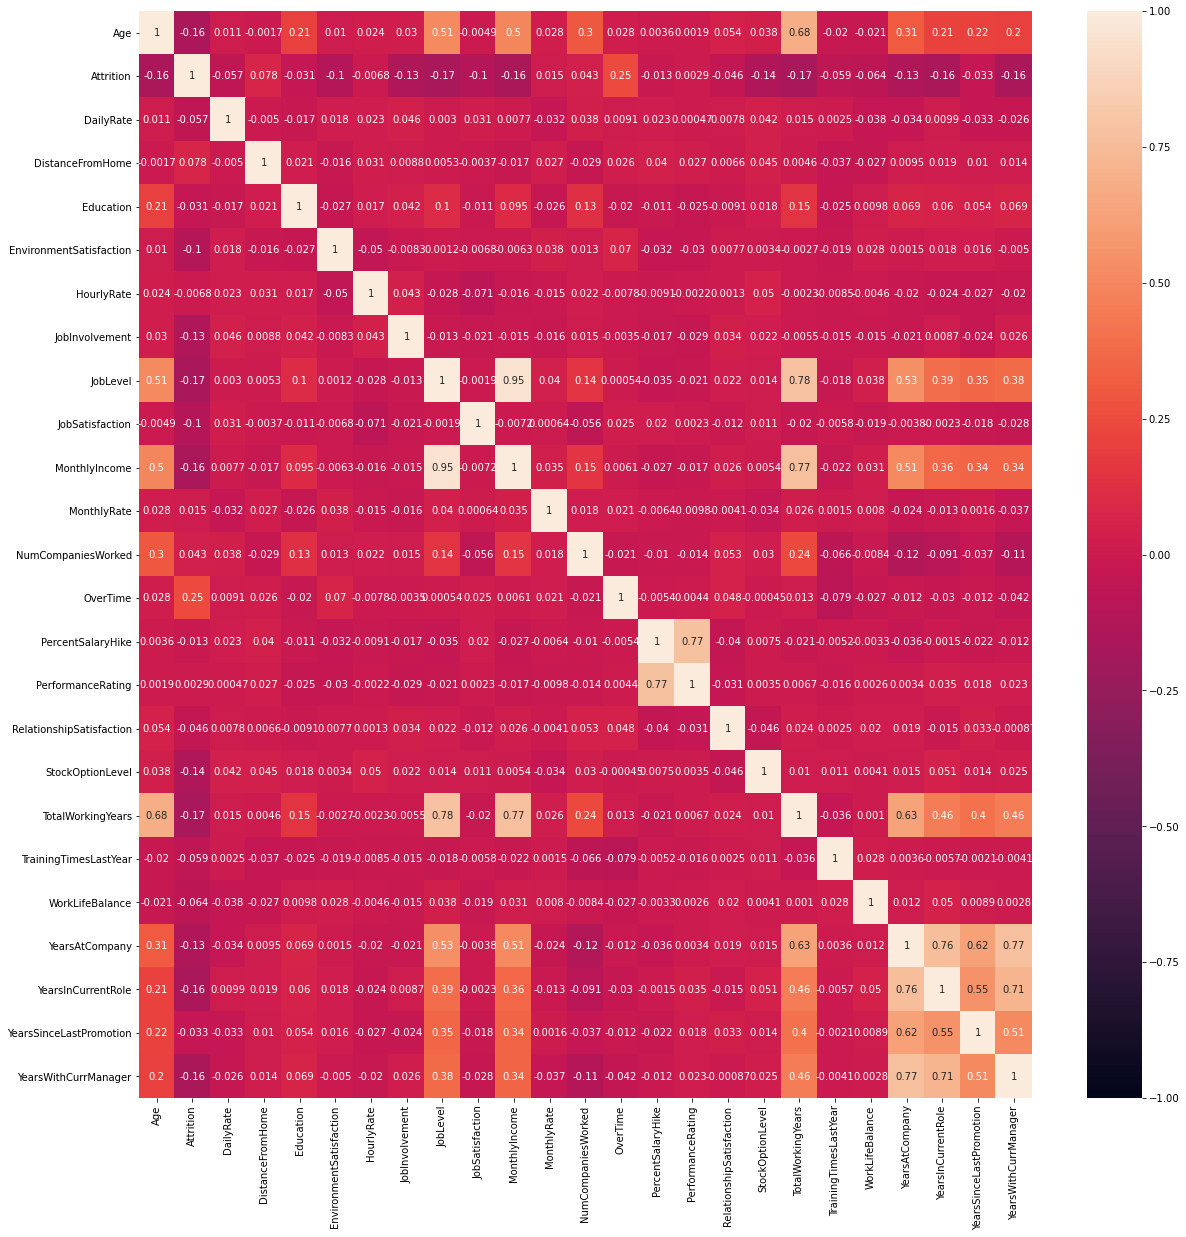

In [15]:
# Correlações
correlations = employee_df.corr()
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(correlations, annot=True, vmin=-1, vmax=1);

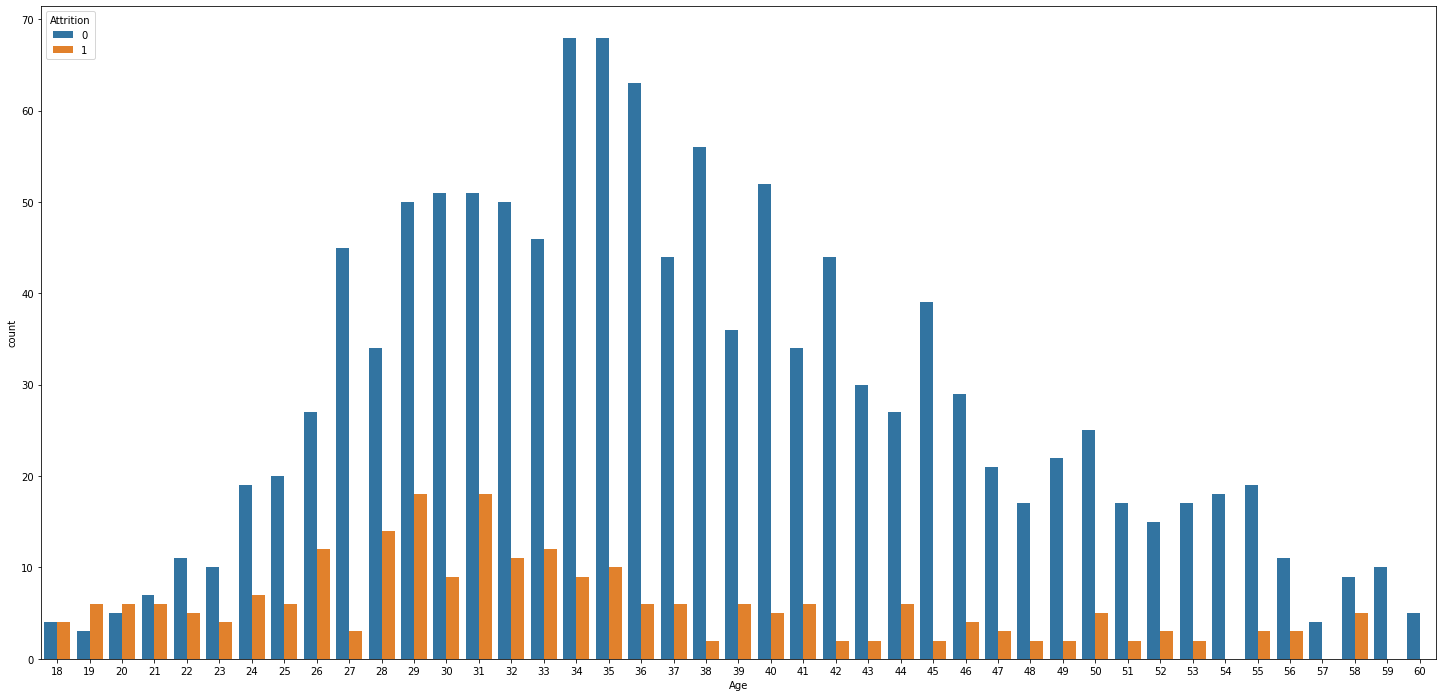

In [16]:
# Gráficos
plt.figure(figsize=(25, 12))
sns.countplot(x='Age', hue='Attrition', data=employee_df);

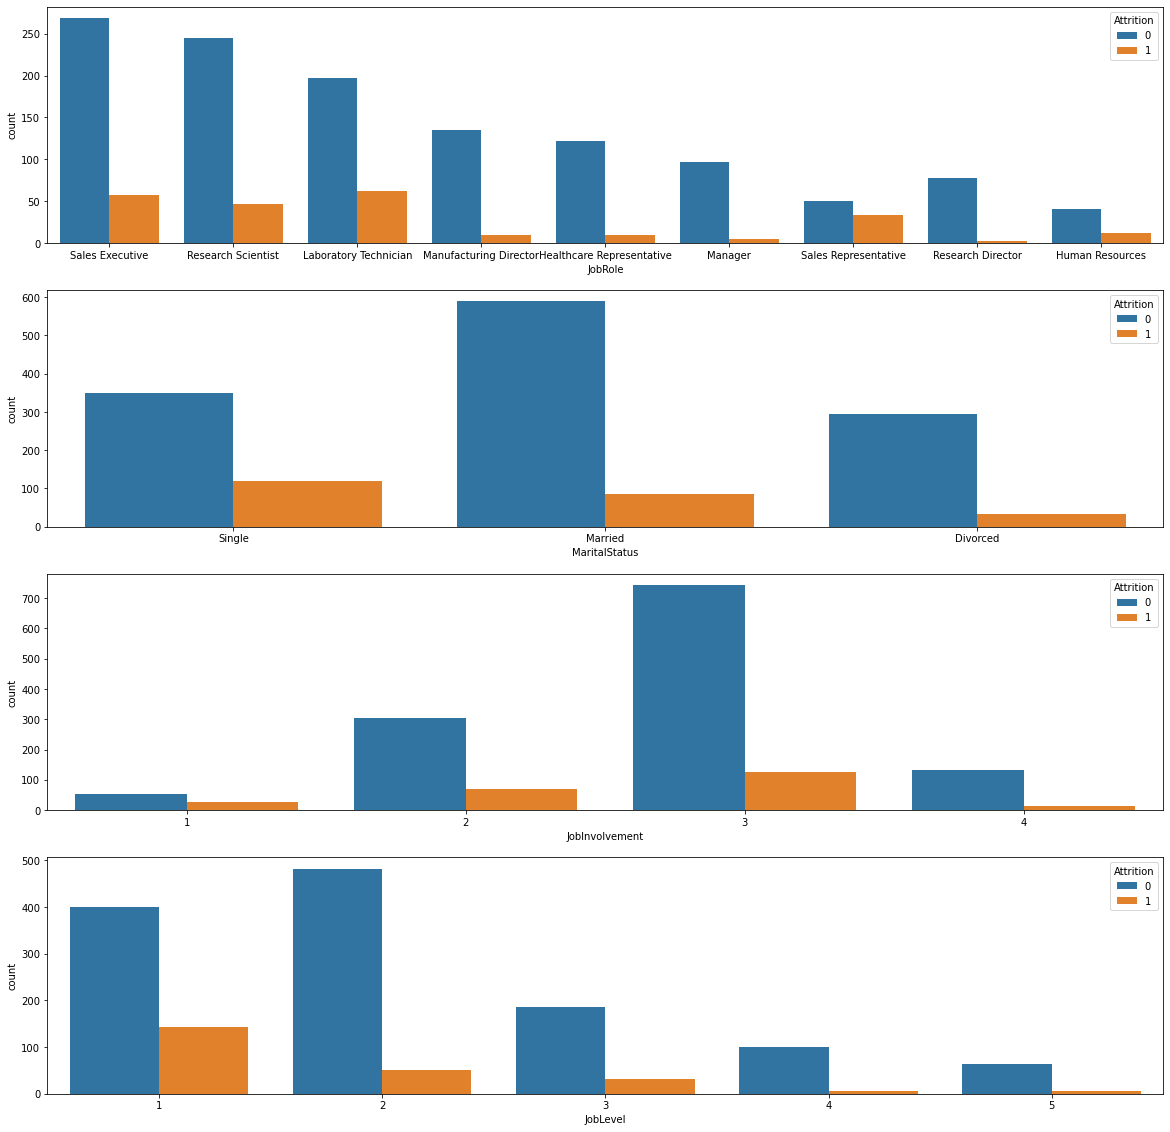

In [17]:
plt.figure(figsize=(20, 20))

plt.subplot(411)
sns.countplot(x='JobRole', hue='Attrition', data=employee_df)

plt.subplot(412)
sns.countplot(x='MaritalStatus', hue='Attrition', data=employee_df)

plt.subplot(413)
sns.countplot(x='JobInvolvement', hue='Attrition', data=employee_df)

plt.subplot(414)
sns.countplot(x='JobLevel', hue='Attrition', data=employee_df);

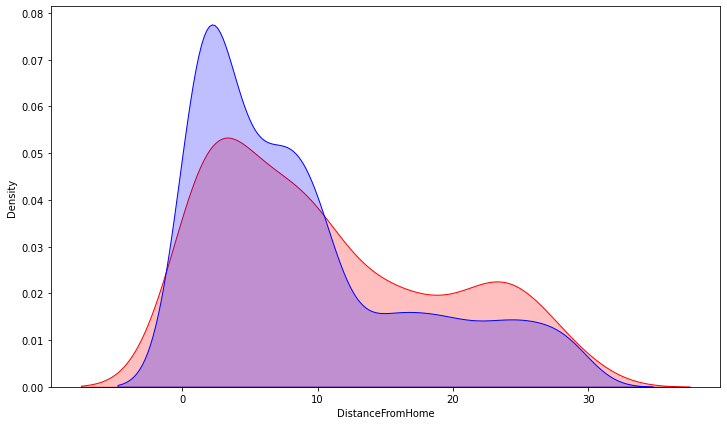

In [18]:
# KDE
plt.figure(figsize=(12, 7))
sns.kdeplot(left_df['DistanceFromHome'], label='Saíram da empresa', shade=True, color='r');
sns.kdeplot(stayed_df['DistanceFromHome'], label='Ficaram na empresa', shade=True, color='b');

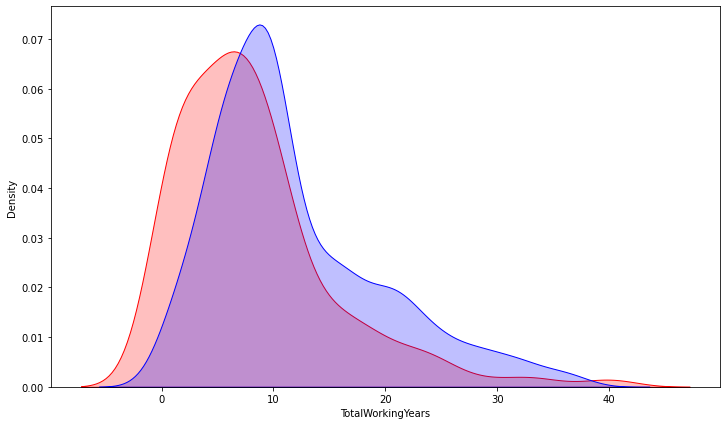

In [19]:
plt.figure(figsize=(12, 7))
sns.kdeplot(left_df['TotalWorkingYears'], label='Saíram da empresa', shade=True, color='r');
sns.kdeplot(stayed_df['TotalWorkingYears'], label='Ficaram na empresa', shade=True, color='b');

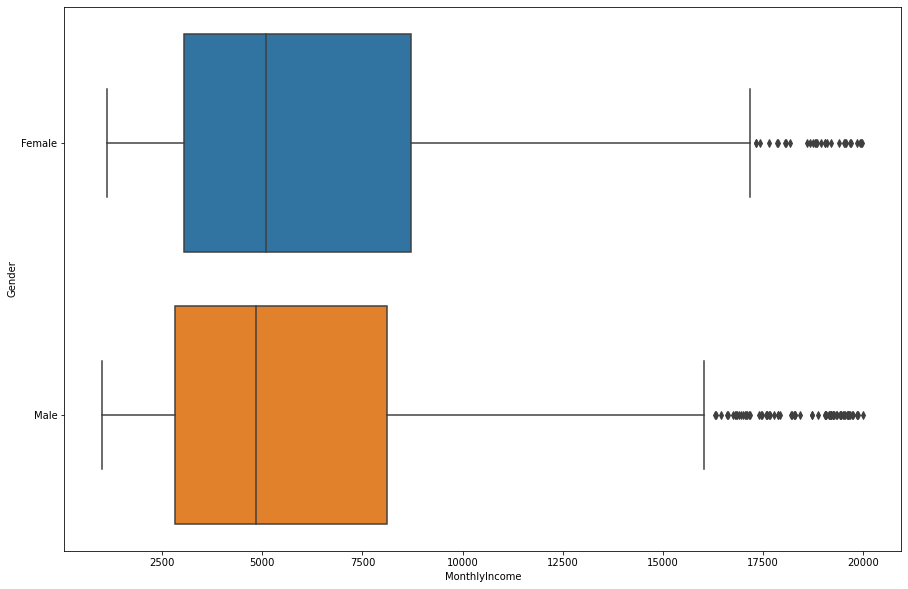

In [20]:
# Boxplots
plt.figure(figsize=(15, 10))
sns.boxplot(x='MonthlyIncome', y='Gender', data=employee_df);

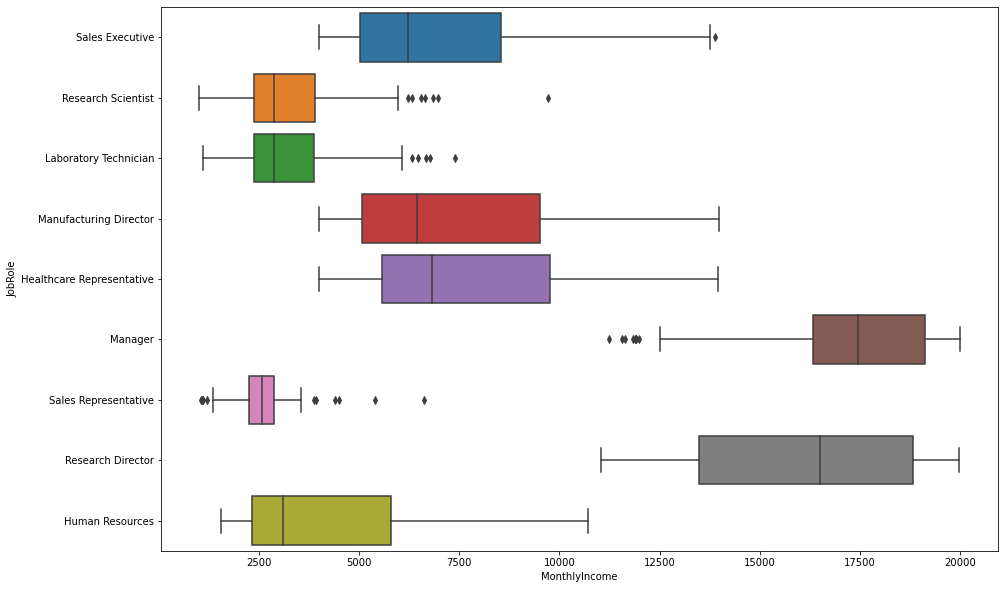

In [21]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='MonthlyIncome', y='JobRole', data=employee_df);

## Pré-processamento 

In [22]:
employee_df.head()

Age  Attrition     BusinessTravel  DailyRate              Department  \
0   41          1      Travel_Rarely       1102                   Sales   
1   49          0  Travel_Frequently        279  Research & Development   
2   37          1      Travel_Rarely       1373  Research & Development   
3   33          0  Travel_Frequently       1392  Research & Development   
4   27          0      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                 1          2  Life Sciences                        2   
1                 8          1  Life Sciences                        3   
2                 2          2          Other                        4   
3                 3          4  Life Sciences                        4   
4                 2          1        Medical                        1   

   Gender  HourlyRate  JobInvolvement  JobLevel                JobRole  \
0  Female          94               3         2        Sales Executive   
1    Male          61               2         2     Research Scientist   
2    Male          92               2         1  Laboratory Technician   
3  Female          56               3         1     Research Scientist   
4    Male          40               3         1  Laboratory Technician   

   JobSatisfaction MaritalStatus  MonthlyIncome  MonthlyRate  \
0                4        Single           5993        19479   
1                2       Married           5130        24907   
2                3        Single           2090         2396   
3                3       Married           2909        23159   
4                2       Married           3468        16632   

   NumCompaniesWorked  OverTime  PercentSalaryHike  PerformanceRating  \
0                   8         1                 11                  3   
1                   1         0                 23                  4   
2                   6         1                 15                  3   
3                   1         1                 11                  3   
4                   9         0                 12                  3   

   RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
0                         1                 0                  8   
1                         4                 1                 10   
2                         2                 0                  7   
3                         3                 0                  8   
4                         4                 1                  6   

   TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                      0                1               6                   4   
1                      3                3              10                   7   
2                      3                3               0                   0   
3                      3                3               8                   7   
4                      3                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

In [23]:
# Dados categóricos
X_cat = employee_df[['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']]
X_cat.head()

BusinessTravel              Department EducationField  Gender  \
0      Travel_Rarely                   Sales  Life Sciences  Female   
1  Travel_Frequently  Research & Development  Life Sciences    Male   
2      Travel_Rarely  Research & Development          Other    Male   
3  Travel_Frequently  Research & Development  Life Sciences  Female   
4      Travel_Rarely  Research & Development        Medical    Male   

                 JobRole MaritalStatus  
0        Sales Executive        Single  
1     Research Scientist       Married  
2  Laboratory Technician        Single  
3     Research Scientist       Married  
4  Laboratory Technician       Married

In [24]:
onehot = OneHotEncoder()
X_cat = onehot.fit_transform(X_cat).toarray()
X_cat

array([[0., 0., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [25]:
X_cat = pd.DataFrame(X_cat)
X_cat.head()

0    1    2    3    4    5    6    7    8    9    10   11   12   13   14  \
0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
1  0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   
2  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0   
3  0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
4  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0   

    15   16   17   18   19   20   21   22   23   24   25  
0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  
1  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  
2  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  
3  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  
4  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0

In [26]:
# Dados numéricos
X_numerical = employee_df[['Age', 'DailyRate', 'DistanceFromHome', 'Education','EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',	'PercentSalaryHike', 'PerformanceRating' ,	'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',	'TrainingTimesLastYear',	'WorkLifeBalance',	'YearsAtCompany',	'YearsInCurrentRole',	'YearsSinceLastPromotion',	'YearsWithCurrManager']]
X_numerical.head()

Age  DailyRate  DistanceFromHome  Education  EnvironmentSatisfaction  \
0   41       1102                 1          2                        2   
1   49        279                 8          1                        3   
2   37       1373                 2          2                        4   
3   33       1392                 3          4                        4   
4   27        591                 2          1                        1   

   HourlyRate  JobInvolvement  JobLevel  JobSatisfaction  MonthlyIncome  \
0          94               3         2                4           5993   
1          61               2         2                2           5130   
2          92               2         1                3           2090   
3          56               3         1                3           2909   
4          40               3         1                2           3468   

   MonthlyRate  NumCompaniesWorked  OverTime  PercentSalaryHike  \
0        19479                   8         1                 11   
1        24907                   1         0                 23   
2         2396                   6         1                 15   
3        23159                   1         1                 11   
4        16632                   9         0                 12   

   PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0                  3                         1                 0   
1                  4                         4                 1   
2                  3                         2                 0   
3                  3                         3                 0   
4                  3                         4                 1   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                  8                      0                1               6   
1                 10                      3                3              10   
2                  7                      3                3               0   
3                  8                      3                3               8   
4                  6                      3                3               2   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                   4                        0                     5  
1                   7                        1                     7  
2                   0                        0                     0  
3                   7                        3                     0  
4                   2                        2                     2

In [27]:
# Junção
X_all = pd.concat([X_cat, X_numerical], axis=1)
X_all.head()

0    1    2    3    4    5    6    7    8    9   10   11   12   13   14  \
0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
1  0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   
2  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0   
3  0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
4  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0   

    15   16   17   18   19   20   21   22   23   24   25  Age  DailyRate  \
0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0   41       1102   
1  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0   49        279   
2  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0   37       1373   
3  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0   33       1392   
4  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   27        591   

   DistanceFromHome  Education  EnvironmentSatisfaction  HourlyRate  \
0                 1          2                        2          94   
1                 8          1                        3          61   
2                 2          2                        4          92   
3                 3          4                        4          56   
4                 2          1                        1          40   

   JobInvolvement  JobLevel  JobSatisfaction  MonthlyIncome  MonthlyRate  \
0               3         2                4           5993        19479   
1               2         2                2           5130        24907   
2               2         1                3           2090         2396   
3               3         1                3           2909        23159   
4               3         1                2           3468        16632   

   NumCompaniesWorked  OverTime  PercentSalaryHike  PerformanceRating  \
0                   8         1                 11                  3   
1                   1         0                 23                  4   
2                   6         1                 15                  3   
3                   1         1                 11                  3   
4                   9         0                 12                  3   

   RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
0                         1                 0                  8   
1                         4                 1                 10   
2                         2                 0                  7   
3                         3                 0                  8   
4                         4                 1                  6   

   TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                      0                1               6                   4   
1                      3                3              10                   7   
2                      3                3               0                   0   
3                      3                3               8                   7   
4                      3                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

In [28]:
# Normalização
scaler = MinMaxScaler()
X = scaler.fit_transform(X_all)
X

array([[0.        , 0.        , 1.        , ..., 0.22222222, 0.        ,
        0.29411765],
       [0.        , 1.        , 0.        , ..., 0.38888889, 0.06666667,
        0.41176471],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 1.        , ..., 0.11111111, 0.        ,
        0.17647059],
       [0.        , 1.        , 0.        , ..., 0.33333333, 0.        ,
        0.47058824],
       [0.        , 0.        , 1.        , ..., 0.16666667, 0.06666667,
        0.11764706]])

In [29]:
# y
y = employee_df['Attrition']
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64

In [30]:
# Divisão da base
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(1176, 50)
(294, 50)
(1176,)
(294,)


## Regressão logística

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
lr = LogisticRegression()

In [33]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)